In [1]:
from diode_simulator import Diode
from tools import plot_surface
import numpy as np
import matplotlib.pyplot as plt

## Initialize the Diode class

In [2]:
input_file = '../input/input.yaml'
D = Diode(input_file = input_file)

## Get Diode signal (Diamond(400) forward scattering, drift, diode iris)

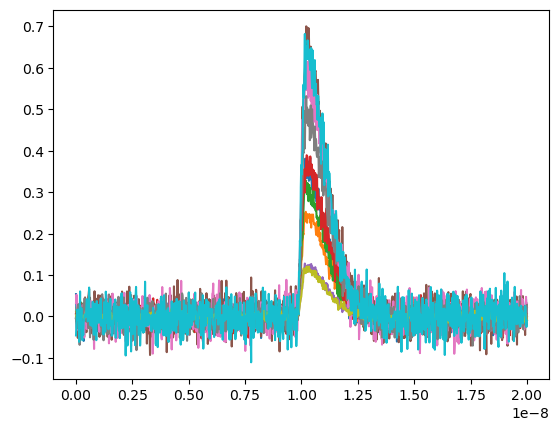

In [3]:
# add 100% noise
for _ in range(10):
    intensity, time, signal = D.get_diode_signal(10.0e-6, jitter_on = True)
    plt.plot(time, signal)

## Scan a theta range

#### Without jitter

Text(0, 0.5, 'Diode Signal')

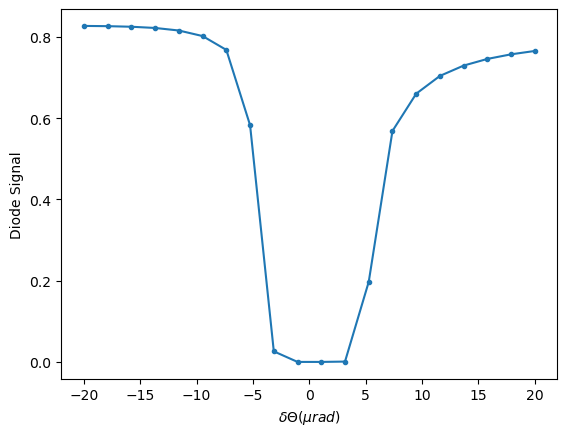

In [13]:
d_theta_range = np.linspace(-20e-6, 20e-6, 20)
intensity_list = []
for d_theta in d_theta_range:
    intensity, time, signal = D.get_diode_signal(d_theta, x0 = 0, y0 = 0, jitter_on = False)
    intensity_list.append(intensity)
plt.plot(d_theta_range*1e6, intensity_list, '.-')
plt.xlabel('$\delta \Theta (\mu rad)$')
plt.ylabel('Diode Signal')

#### Jitter on, average over 10 shots for each point

Text(0, 0.5, 'Diode Signal')

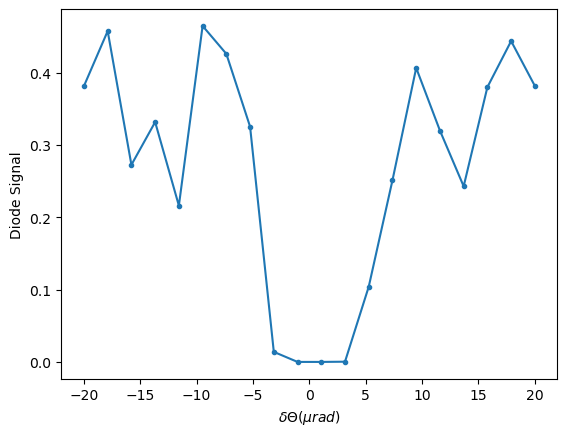

In [18]:
d_theta_range = np.linspace(-20e-6, 20e-6, 20)
Nshot_integral = 10
intensity_list = []
for d_theta in d_theta_range:
    ave_intensity = 0
    for _ in range(Nshot_integral):
        intensity, time, signal = D.get_diode_signal(d_theta, x0 = 0, y0 = 0)
        ave_intensity += intensity
    ave_intensity /= Nshot_integral
    intensity_list.append(ave_intensity)
plt.plot(d_theta_range*1e6, intensity_list, '.-')
plt.xlabel('$\delta \Theta (\mu rad)$')
plt.ylabel('Diode Signal')

## Scan diode center

#### For a misaligned Crystal, scanning the diode position

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Diode Signal')

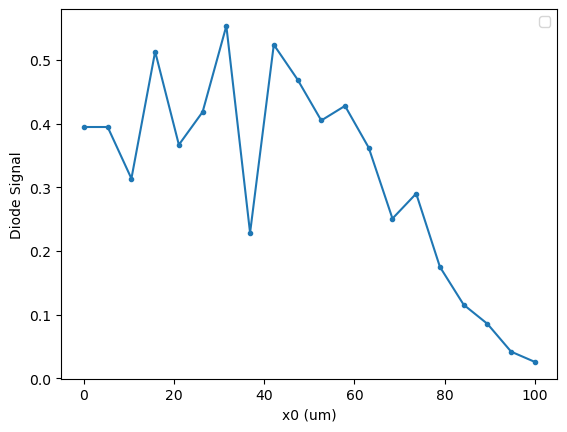

In [5]:
intensity_list = []
Nshot_integral = 10
x0_range = np.linspace(0, 100e-6, 20)
for x0 in x0_range:
    x0 = x0
    y0 = 0.0
    ave_intensity = 0
    for _ in range(Nshot_integral):
        intensity, time, signal = D.get_diode_signal(d_theta = 100e-6, x0 = x0, y0 = y0)
        ave_intensity += intensity
    ave_intensity /= Nshot_integral
    intensity_list.append(ave_intensity)
plt.plot(x0_range*1e6, intensity_list, '.-')
plt.legend()
plt.xlabel('x0 (um)')
plt.ylabel('Diode Signal')

#### The rocking curve with diode position error within 50um

Text(0, 0.5, 'Diode Signal')

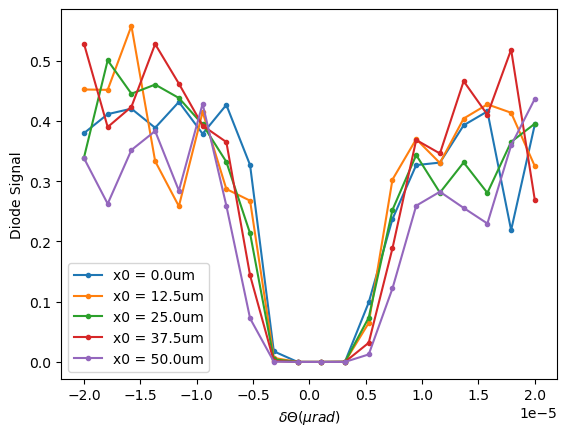

In [17]:
for x0 in np.linspace(0, 50e-6, 5):
    x0 = x0
    y0 = 0
    d_theta_range = np.linspace(-20e-6, 20e-6, 20)
    Nshot_integral = 10
    intensity_list = []
    for d_theta in d_theta_range:
        ave_intensity = 0
        for _ in range(Nshot_integral):
            intensity, time, signal = D.get_diode_signal(d_theta, x0 = x0, y0 = y0)
            ave_intensity += intensity
        ave_intensity /= Nshot_integral
        intensity_list.append(ave_intensity)
    plt.plot(d_theta_range, intensity_list, '.-', label = 'x0 = ' + str(x0*1e6) + 'um')
plt.legend()
plt.xlabel('$\delta \Theta (\mu rad)$')
plt.ylabel('Diode Signal')